Research Question/Prediction:
Predict the most valuable customer in upcoming years to increase the efficiency. (Predicting the future spending of a customer)

In [2]:
# IMPORT LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
# Read the dataset

df = pd.read_csv(r"E:/UFT_TeamProject/updated_file/combined_table.csv")

In [19]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [20]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [21]:
df.shape

(1067371, 8)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Data Cleaning

In [23]:
# Finding missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [24]:
# Percentage of missing values
df.isnull().sum()/df.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [25]:
# Finding duplicates
df.duplicated().sum()

34335

In [26]:
# Finding garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("********")

Invoice
537434     1350
538071     1304
537638     1202
537237     1194
536876     1186
           ... 
C518262       1
548515        1
C548513       1
C524395       1
559376        1
Name: count, Length: 53628, dtype: int64
********
StockCode
85123A       5829
22423        4424
85099B       4216
21212        3318
20725        3259
             ... 
21345           1
DCGS0067        1
DCGS0066P       1
DCGS0071        1
90197A          1
Name: count, Length: 5304, dtype: int64
********
Description
WHITE HANGING HEART T-LIGHT HOLDER     5918
REGENCY CAKESTAND 3 TIER               4412
JUMBO BAG RED RETROSPOT                3469
ASSORTED COLOUR BIRD ORNAMENT          2958
PARTY BUNTING                          2765
                                       ... 
add stock to allocate online orders       1
eurobargain invc/credit                   1
CHROME EURO HOOK 20cm                     1
allocate stock for dotcom orders ta       1
correct previous adjustment               1
Name: count, 

In [27]:
# Choose the method of inputting missing values
# We have only missing values in Description & Customer ID. Where customer id should be unique. So dropping the missing rows instead of filling them.

df = df.dropna(subset=['Customer ID'])

In [28]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [29]:
df.duplicated().sum()

26479

In [30]:
df = df.drop_duplicates()

In [31]:
df.duplicated().sum()

0

In [32]:
garbage_descriptions = [
    'stock credited from royal yacht inc',
    'dotcom email'
]
df = df[~df['Description'].isin(garbage_descriptions)]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [34]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Feature engineering: We can create new features such as:

Total Spend(by customer): Quantity * Price

Recency: Days since the customer's last purchase.

Frequency: Number of purchases made by the customer.

Monetary Value: Sum of the customer's total spend.

In [35]:
# Create a new column for TotalSpend (Quantity * Price) for each customer.
df['TotalSpend'] = df['Quantity'] * df['Price']

In [36]:
# Group by both 'Customer ID' column
#rfm_df = df.groupby(['Customer ID','Country'])

rfm_df = df.groupby(['Customer ID','Country']).agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency of purchases
    'TotalSpend': 'sum'  # Total spend (Monetary value)
}).reset_index()


In [37]:
# Rename columns to reflect RFM metrics
rfm_df.columns = ['Customer ID', 'Country', 'Recency', 'Frequency', 'Monetary']


In [38]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5955 entries, 0 to 5954
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5955 non-null   float64
 1   Country      5955 non-null   object 
 2   Recency      5955 non-null   int64  
 3   Frequency    5955 non-null   int64  
 4   Monetary     5955 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 232.7+ KB


In [39]:
rfm_df.head()

,Customer ID,Country,Recency,Frequency,Monetary
0,12346.0,United Kingdom,325,17,-51.74
1,12347.0,Iceland,1,8,4921.53
2,12348.0,Finland,74,5,2019.40
3,12349.0,Italy,18,5,4404.54
4,12350.0,Norway,309,1,334.40


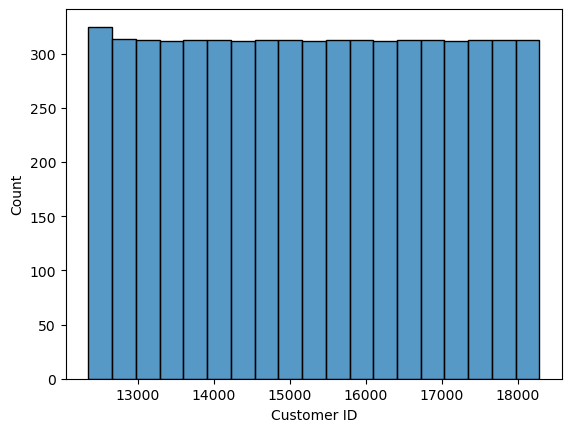

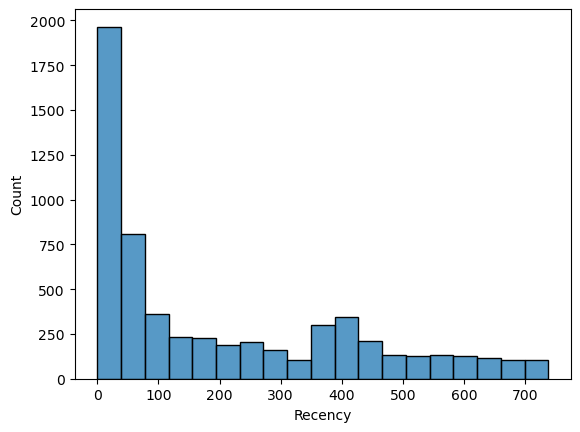

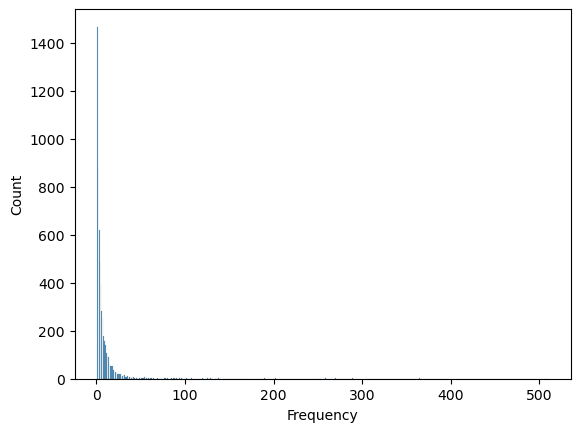

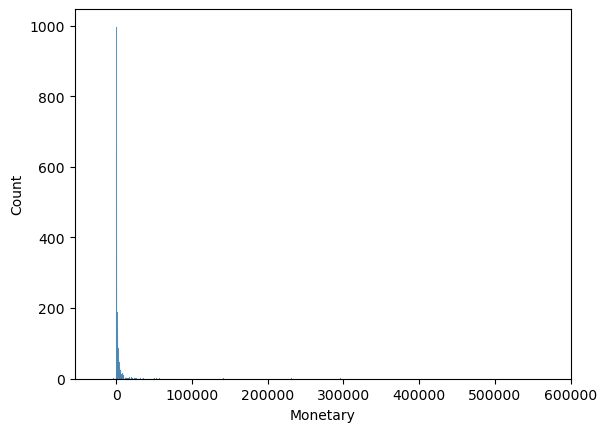

In [40]:
#histogram to understand the distribution

#sample_df = df.sample(1000)  # Sample 1000 rows
for i in rfm_df.select_dtypes(include="number").columns:
    sns.histplot(data=rfm_df, x=i)
    plt.show()

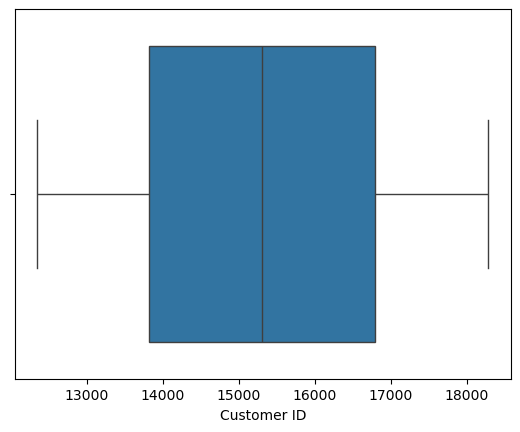

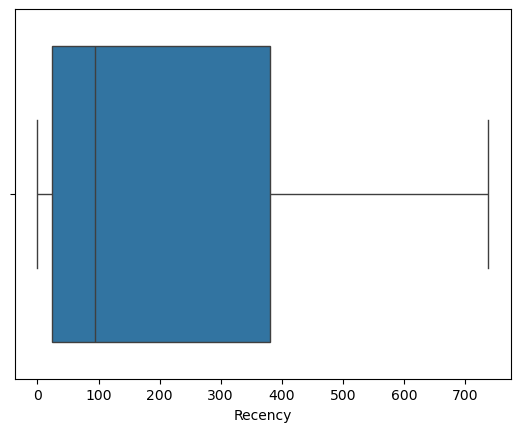

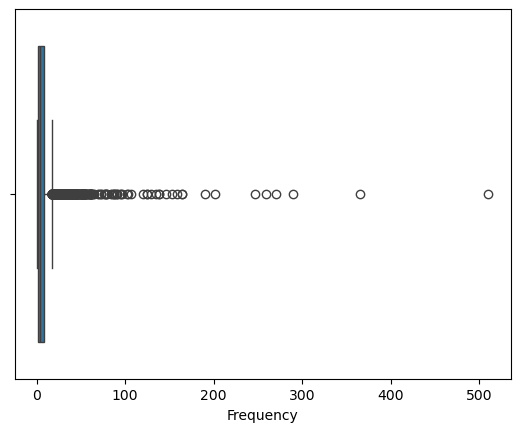

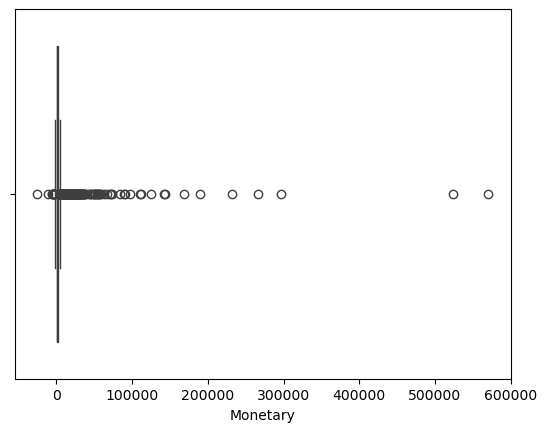

In [41]:
# Boxplot to identify Outliers

for i in rfm_df.select_dtypes(include="number").columns:
    sns.boxplot(data=rfm_df, x=i)
    plt.show()

In [42]:
# Scatter plot to understand the relationship

rfm_df.select_dtypes(include="number").columns

Index(['Customer ID', 'Recency', 'Frequency', 'Monetary'], dtype='object')

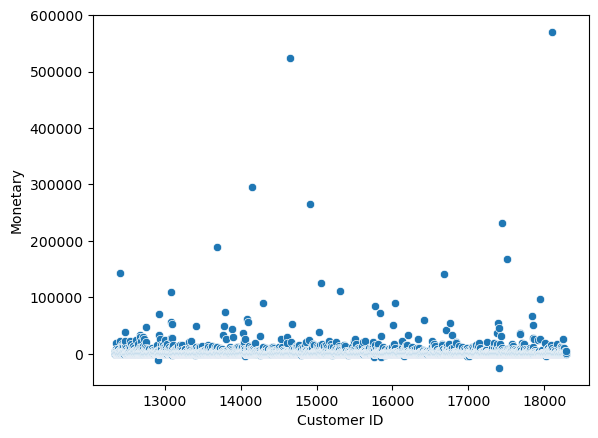

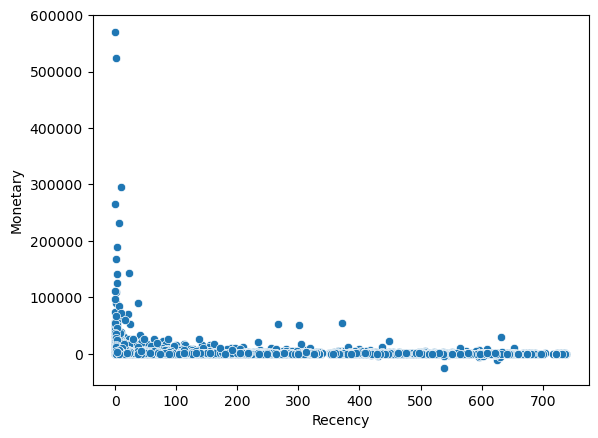

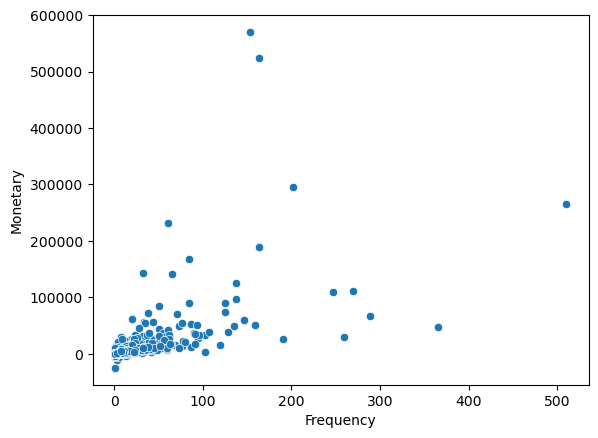

In [43]:
for i in ['Customer ID', 'Recency', 'Frequency']:
    sns.scatterplot(data=rfm_df, x=i, y='Monetary')
    plt.show()

In [44]:
# correlation with heatmap to interpret the relation and multicolliniarity
c = rfm_df.select_dtypes(include="number").corr()

<Axes: >

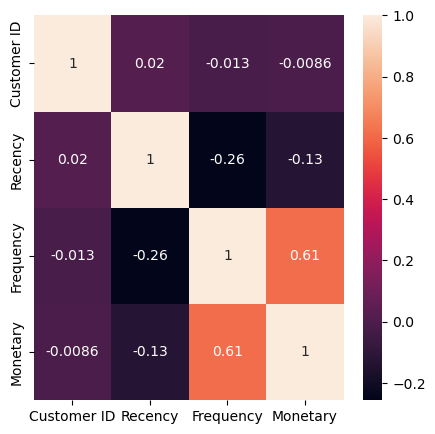

In [45]:
plt.figure(figsize=(5,5))
sns.heatmap(c,annot=True)

In [ ]:
# Removing Outlier
# IQR Method: Calculate the Interquartile Range (IQR) and identify values that fall below Q1−1.5×IQR or above Q3+1.5×IQR.

#Q1 = rfm_df['Quantity'].quantile(0.25)
#Q3 = rfm_df['Quantity'].quantile(0.75)
#IQR = Q3 - Q1

#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#outliers_iqr = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
#print(outliers_iqr)


In [46]:
# Removing Outlier
# IQR Method: Calculate the Interquartile Range (IQR) and identify values that fall below Q1−1.5×IQR or above Q3+1.5×IQR.

def boundaries(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound,upper_bound

In [47]:
boundaries(rfm_df['Recency'])

(-510.0, 914.0)

In [48]:
for i in ['Recency','Frequency', 'Monetary']:
    lower_bound,upper_bound = boundaries(rfm_df[i])
    rfm_df[i]=np.where(rfm_df[i]<lower_bound, lower_bound, rfm_df[i])
    rfm_df[i]=np.where(rfm_df[i]>upper_bound, upper_bound, rfm_df[i])


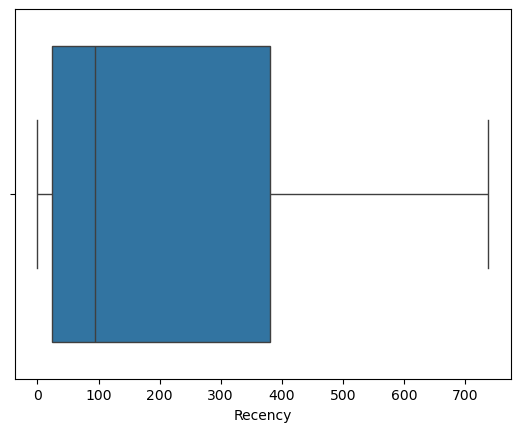

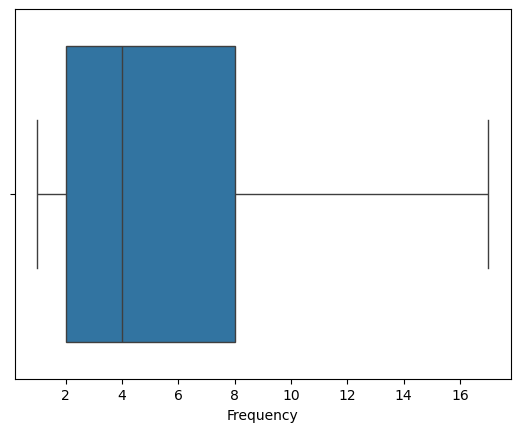

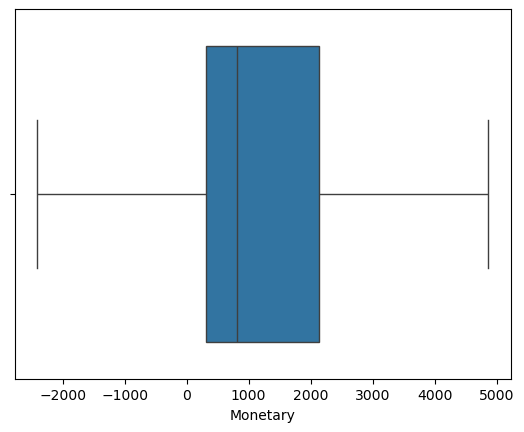

In [49]:
for i in ['Recency','Frequency', 'Monetary']:    
    sns.boxplot(data=rfm_df, x=i)
    plt.show()



Choosing a Machine Learning Model

Consider models like:

Linear Regression: For predicting monetary value directly.

Random Forest Regressor: To capture non-linear relationships.

Gradient Boosting Machines (GBM): For better performance with structured data

Proceeding with Linear Regression:

 Standardization (Z-Score Normalization)
 Formula: z= (x−μ)/σ
    
Where:
x is the feature value,
μ is the mean,
σ is the standard deviation.

In [50]:
#from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the features that need to be scaled
features_to_scale = ['Recency', 'Frequency', 'Monetary']

# Fit and transform the selected features
rfm_df_scaled = rfm_df.copy()  # Copy the original dataframe
rfm_df_scaled[features_to_scale] = scaler.fit_transform(rfm_df[features_to_scale])

print(rfm_df_scaled.head())


   Customer ID         Country   Recency  Frequency  Monetary
0      12346.0  United Kingdom  0.580049   2.186431 -0.976048
1      12347.0         Iceland -0.949619   0.457857  2.145302
2      12348.0         Finland -0.604971  -0.118335  0.338524
3      12349.0           Italy -0.869359  -0.118335  1.852396
4      12350.0          Norway  0.504510  -0.886590 -0.730962


In [51]:
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

# Defined features and target
X = rfm_df_scaled[['Recency', 'Frequency']]  # Features
y = rfm_df_scaled['Monetary']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [52]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the monetary value for the test set
y_pred = model.predict(X_test)

print(y_pred)

[ 0.10270072 -0.8479741   1.06993489 ...  0.27392543 -0.57560742
 -0.22524882]


In [53]:
#from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.2862402651029108
R-squared: 0.7236643571442618


In [54]:
# Calculate the mean of the target variable (Monetary)
mean_monetary = y_test.mean()

# Print the results
print(f"Mean value of Monetary (in test set): {mean_monetary}")
print(f"MSE: {mse}")

Mean value of Monetary (in test set): 0.028424843247983066
MSE: 0.2862402651029108


Predicting the most valuable customers based on your current dataset 

In [55]:
# rfm_df_scaled is the scaled DataFrame and the model is already trained

# Select the features for prediction (Recency and Frequency)
X_all = rfm_df_scaled[['Recency', 'Frequency']]  # Features for all customers

# Predict the monetary value for all customers
predicted_values = model.predict(X_all)

# Add the predicted values to the original DataFrame
rfm_df_scaled['Predicted_Monetary'] = predicted_values


In [56]:

# Sort by predicted monetary value to identify the most valuable customers
most_valuable_customers = rfm_df_scaled.sort_values(by='Predicted_Monetary', ascending=False)

# Display the top N most valuable customers (e.g., top 10)
top_n = 10
print(most_valuable_customers.head(top_n))

      Customer ID         Country  Recency  Frequency  Monetary  \
3463      15796.0  United Kingdom -0.95434   2.186431  2.145302   
5056      17389.0  United Kingdom -0.95434   2.186431  2.145302   
765       13098.0  United Kingdom -0.95434   2.186431  2.145302   
5031      17364.0  United Kingdom -0.95434   2.186431  2.145302   
4668      17001.0  United Kingdom -0.95434   2.186431  2.145302   
3565      15898.0  United Kingdom -0.95434   2.186431  2.145302   
1177      13510.0  United Kingdom -0.95434   2.186431  1.905616   
748       13081.0  United Kingdom -0.95434   2.186431  2.145302   
415       12748.0  United Kingdom -0.95434   2.186431  2.145302   
1718      14051.0  United Kingdom -0.95434   2.186431  2.145302   

      Predicted_Monetary  
3463            1.866851  
5056            1.866851  
765             1.866851  
5031            1.866851  
4668            1.866851  
3565            1.866851  
1177            1.866851  
748             1.866851  
415             1.8

Conclusion: Based on the prediction, the above customers may spend more amount in future, hence considering them as most valuable customers.